# Load Data

In [ ]:
# The goal of this predictive analysis is to be able to take predict the if someone is likely to
# Heart Disease or not.

# Load into a dataframe, set the header as row 0 of the dataset
import pandas as pd

# The dataset was obtained from Kaggle ==> # https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
# The file is a semi-colon separated file, so we'll use sep=';'
heart_disease_df = pd.read_csv('heart_disease.csv', header=[0], sep=';')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Data Transformation

In [ ]:
# Some of the columns names are a little bit ambiguous, so we're going to flesh them out a little bit.
# According to the dataset:
#   ap_h1 is the Systolic Blood Pressure, ap_lo is the Diastolic blood pressure, 'smoke' identifies whether they're a smoker or not.
#   and cardio is the presence or absence of cardiovasculaer disease, 'alco' means 'Alcohol intake', and 'gluc' means 'glucose'
# We'll use inplace set to True to replace the df instead of creating a new one
heart_disease_df.rename(columns={'ap_hi': 'systolic_bp', 'ap_lo': 'diastolic_bp', 'gluc': 'glucose', 'smoke': 'smoker', 'alco': 'alcohol_intake', \
                                 'cardio': 'heart_disease'}, inplace=True)

          id    age  gender  height  weight  systolic_bp  diastolic_bp  \
0          0  18393       2     168    62.0          110            80   
1          1  20228       1     156    85.0          140            90   
2          2  18857       1     165    64.0          130            70   
3          3  17623       2     169    82.0          150           100   
4          4  17474       1     156    56.0          100            60   
...      ...    ...     ...     ...     ...          ...           ...   
69995  99993  19240       2     168    76.0          120            80   
69996  99995  22601       1     158   126.0          140            90   
69997  99996  19066       2     183   105.0          180            90   
69998  99998  22431       1     163    72.0          135            80   
69999  99999  20540       1     170    72.0          120            80   

       cholesterol  glucose  smoker  alcohol_intake  active  heart_disease  
0                1        1       

In [ ]:
# We can't make predictions if there are missing values, so first check if there are any missing values.
any_missing_values = heart_disease_df.isnull().any().any()
# print(any_missing_values) //Output: False

False


# Feature Engineering

In [ ]:
# For this prediction, our label will be the heart_disease column. As such, we can get rid of the id as it has no effect on the label.
heart_disease_df_2 = heart_disease_df.drop(['id'], axis=1, inplace=False)

# Now we can get our features and corresponding labels
# We'll use axis one to drop columns as opposed to rows
X = heart_disease_df_2.drop(['heart_disease'], axis=1)
y = heart_disease_df_2['heart_disease']

         age  gender  height  weight  systolic_bp  diastolic_bp  cholesterol  \
0      18393       2     168    62.0          110            80            1   
1      20228       1     156    85.0          140            90            3   
2      18857       1     165    64.0          130            70            3   
3      17623       2     169    82.0          150           100            1   
4      17474       1     156    56.0          100            60            1   
...      ...     ...     ...     ...          ...           ...          ...   
69995  19240       2     168    76.0          120            80            1   
69996  22601       1     158   126.0          140            90            2   
69997  19066       2     183   105.0          180            90            3   
69998  22431       1     163    72.0          135            80            1   
69999  20540       1     170    72.0          120            80            2   

       glucose  smoker  alcohol_intake 

In [ ]:
"""
# To ensure the best quality features, reduce dimensionality, etc. we're going to now apply Principal Component Analysis (PCA)
# Which is a process whereby the features are standardized to a given scale, a covariance matrix is created to understand how different
features relate to one another. Next eigendecomposition is done to get a set of eigenvectors and eigenvalues The eigenvectors tells us
the direction in which the data varies most, and the eigenvalues indicate the magnitude of the variance in that direction. The eigenvectors
are sorted in descending order based on their eigenvalues, and the top eigenvectors are selected given that they represent the most amount
of variance. The original data is then projected onto the new feature space formed by the selected principal components.
This transformation results in a new set of uncorrelated features.
"""
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = StandardScaler().fit_transform(X)
pca = PCA(n_components=11)
X2 = pca.fit_transform(X)

[[ 0.07011957 -0.55294217 -0.51915679 -0.31002063 -0.01623797 -0.03262863
  -0.01244998 -0.01378165 -0.45257172 -0.34193825 -0.01689619]
 [ 0.32212689 -0.06822046 -0.05644645  0.26387326  0.06585638  0.06777236
   0.65065812  0.62022967 -0.03814994  0.01553161 -0.00986399]
 [ 0.05511639  0.1283084   0.3959397   0.42093512  0.10812844  0.09119463
  -0.11225121 -0.07867406 -0.44909592 -0.57788198 -0.26853606]
 [ 0.12858416 -0.04057018 -0.08464986  0.02139275  0.62851867  0.6824778
  -0.07390193 -0.14777645  0.02186032  0.07182691  0.28363516]
 [ 0.11720458 -0.03016783 -0.12075386 -0.09662547  0.45989219 -0.1577958
  -0.03195694 -0.04131143  0.14062991  0.19397056 -0.81541734]
 [-0.03895064  0.03002061  0.07057044  0.01383003  0.59033996 -0.67926337
   0.01739532  0.02315396 -0.05082894 -0.09411407  0.41258989]
 [-0.91216124 -0.11311269  0.02797816  0.00410694  0.15765003  0.14404625
   0.14575282  0.27242591 -0.05004448 -0.01655463 -0.10259932]
 [-0.06626817 -0.43111359 -0.14741013  0.72

[0.17645335 0.14341115 0.10308888 0.09237881 0.08992198 0.08934537
 0.08496648 0.07357909 0.0569561  0.04901013 0.04088864]


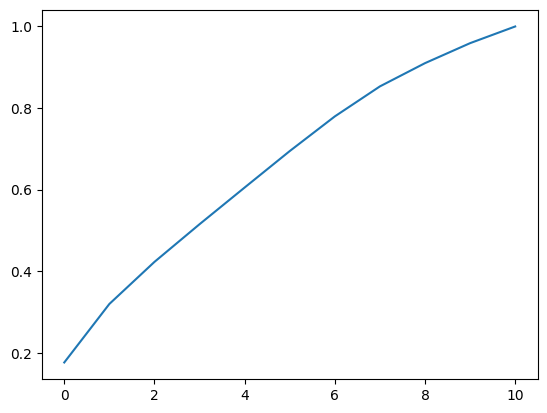

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Now we need to out how many components we actually need. To do this, we'll find the elbow point a graph the variance over the principal component
# To check the contribution of each component we can run this next line of code
np.set_printoptions(suppress=True)

# We can also visualise it to see a little better
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(pc_vs_variance)

# The lack of an elbow point in the cumulative explained variance graph suggests a somewhat consistent level of contribution across the components

# Supervised Machine Learning

In [ ]:
"""
We'll be using the Bagging Meta-estimator because of it's efforts in reducing overfitting and the variance of the base estimators,
improving the stability and robustness of the ensemble. More on that here ==>
https://www.linkedin.com/advice/1/what-pros-cons-using-ensemble-methods-ml-skills-algorithms
"""
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
"""
Now we want to prepare our data by splitting it into two parts. We want one part to be used for training the classifier into a suitable
model to make predictions for us, and we want to use the remaining samples as test samples to make predictions and test our model. Random_state
controls the shuffling applied to the data before applying the split.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Now we want to fit PCA on the training data
pca = PCA(n_components=11)
pca.fit(X_train)
X_train_2 = pca.transform(X_train)
"""
Bagging, or bootstrap aggregating, involves creating multiple models from different subsets of the training data, and then averaging
or voting their predictions. max_samples is the max number of samples to draw from X to train each base estimator. Max_features number
of features to use to train each base estimator. Because the numbers are floats it'll use 50% of the samples and 50% of the features.
KNeighborsClassifier is the base estimator to fit on random subsets of the dataset, it works by finding the k nearest neighbour(s) the
new data point is closest to, and uses their classes to predict what the class of the new data point should be.
"""

bagging_clf = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)

# Now we need to train our model, based on the traine
bagging_clf.fit(X_train_2,y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)

In [ ]:
"""
Now let's make some predictions. But first we need to transform X_test into the new feature space.
It's generally recommended to apply the same dimensionality reduction (PCA transformation) to both
the training and test datasets to ensure consistency in the feature representation.
"""
X_test_2 = pca.transform(X_test)

bagging_clf.predict(X_test_2)

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
# Now let's calculate the accuracy of the model, this next function compares the predictions for X_test_2 with its expected label in y_test
bagging_clf.score(X_test_2, y_test)

0.6507142857142857

In [ ]:
# The accuracy is around 0.65 which is really low, ideally speaking we'd like something that's at least 0.7. Let's try a different model.
from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression(random_state=0).fit(X_train_2, y_train)
logreg_clf.predict(X_test_2)

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
# This has an accuracy score of about 0.72, so it seems like the Logistic Regression classifier is a better choice
logreg_clf.score(X_test_2, y_test)

0.7235

In [ ]:
# Now let's try one more to see if we can get a better score
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

mlp_clf.fit(X_train_2, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
mlp_clf.predict(X_test_2)
# 0.73, marginal, but still a better result than the last two models.
mlp_clf.score(X_test_2, y_test)

0.7311428571428571

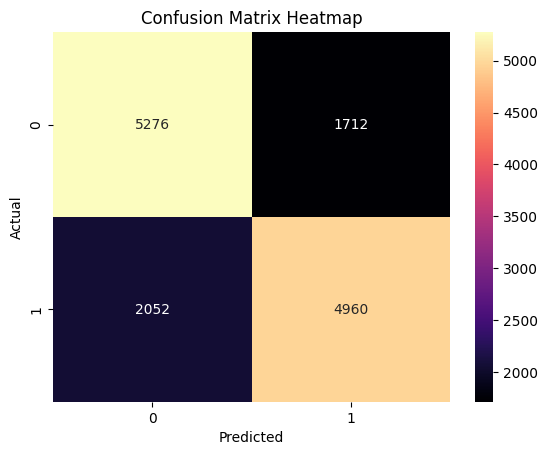

In [ ]:
"""
Let's also take a look at it's confusion matrix to understand how likely it is to make predictions that are
false negative, true positives, etc.
"""
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = mlp_clf.predict(X_test_2)
cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="magma")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
"""
Now let's make a prediction:
Let's say we have a patient, Mark, born on April 6, 1982 (15,180 days old) male (value of 2) who is about 178m tall, weighing in at about 112kg.
He has a systolic blood pressure of 110 and a diastolic blood pressure of 90. His cholestrol is normal (value of 1),
however his glucose levels are above normal (value of 2). He's not a smoker (value of 0), he does drink a fair bit (value of 1),
and he plays rugby every weekend and trains with the club every Tuesday evening as well as has a few gym sessions in the week too.
"""

from datetime import date

marks_stats = {
    'birthday': '1982-06-04',
    'gender': 'M',
    'height': 178,
    'weight': 112.0,
    'systolic_bp': 110,
    'diastolic_bp':90,
    'cholesterol': 'normal',
    'glucose': 'normal',
    'smoker': False,
    'alcohol_intake': True,
    'active': True
}

#Let's make a predictor function to do all the work for us
def mlp_heart_disease_predictor(patient_stats):
  # Convert the stats into a suitable format and reshape the result to the right dimensions
  nparray = np.array(stats_conversion(mark_stats)).reshape(1,11)

  # Apply PCA transformation
  patient_stats_pca=pca.transform(nparray)
  # Make prediction
  return mlp_clf.predict(patient_stats_pca)

def stats_conversion(raw_patient_stats):
  converted_stats = {
      'birthday':  get_days_from_bday(raw_patient_stats['birthday']),
      'gender': 1 if raw_patient_stats['gender'] == 'F' else 2,
      'height': raw_patient_stats['height'],
      'weight': raw_patient_stats['weight'],
      'systolic_bp': raw_patient_stats['systolic_bp'],
      'diastolic_bp': raw_patient_stats['diastolic_bp'],
      'cholesterol': get_cholesterol_index(raw_patient_stats['cholesterol']),
      'glucose': get_glucose_index(raw_patient_stats['glucose']),
      'smoker': 1 if raw_patient_stats['smoker'] else 0,
      'alcohol_intake': 1 if raw_patient_stats['alcohol_intake'] else 0,
      'active': 1 if raw_patient_stats['active'] else 0,
  }
  converted_stats_as_list = [value for key, value in converted_stats.items()]
  return converted_stats_as_list

def get_days_from_bday(original_birthday_input):
# Birthday - convert the date given into the Pythonic date format.
  bday_date = date(*map(int, original_birthday_input.split('-')))
  today_date = date.today()
  return (today_date - bday_date).days

def get_cholesterol_index(original_cholesterol_input):
  match original_cholesterol_input:
    case 'normal':
      return 1
    case 'above normal':
      return 2
    case 'well above normal':
      return 3

def get_glucose_index(original_glucose_input):
  match original_glucose_input:
    case 'normal':
      return 1
    case 'above normal':
      return 2
    case 'well above normal':
      return 3
# mlp_heart_disease_predictor(mark_stats)
mlp_heart_disease_predictor(marks_stats)


array([1])